<a href="https://colab.research.google.com/github/Jun-629/20MA573/blob/master/src%5CHw2_finite_difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
- Goal:
    - Learn the second order derivative approximation: second order central finite difference
    - Understand convergence rate


# Problem 

Let $f(x) = \sin x$. Plot $f''$ and $\delta_{-h} \delta_h f$ with $h = .5$

# Anal


One of the commonly used FD for $f''$ is the following:
$$f''(x) = \frac{d}{dx} f'(x) \simeq \delta_h f'(x) \simeq \delta_h \delta_{-h} f(x).$$
If we write it explicitly, then
$$f''(x) \simeq \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2}.$$

__Prop__

The central finite difference for the second order has convergence order $1$.

__Proof__ 

\begin{equation}
\begin{aligned}
|\frac{f(x+h) - 2 f(x) + f(x-h)}{h^2} - f''(x)| &= |\frac{[f(x+h) - f(x)] - [f(x) - f(x-h)]}{h^2} - f''(x)|\\ 
&= |\frac{[f'(x) \cdot h + f''(x) \cdot \frac{h^2}{2} + O(h^3)] - [f'(x) \cdot h - f''(x) \cdot \frac{h^2}{2} + O(h^3)]}{h^2} - f''(x)| \\
&= |f''(x) + O(h) - f''(x)| \\
&= O(h)
\end{aligned}
\end{equation}
Q.E.D


# Code

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sfd(f, x, h):
    # your input here;
    return (f(x+h) - 2*f(x) + f(x-h))/h/h


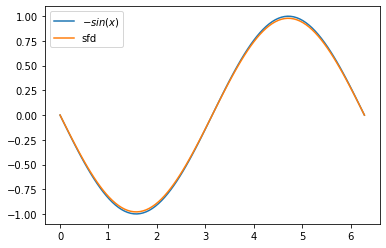

In [0]:
'''
Remove all #s below to plot a figure:
    x_cod: points at which the derivative to be computed
    y_cod: estimated derivative by finite difference
    numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    https://blog.csdn.net/you_are_my_dream/article/details/53493752
'''

h = .5 #step size

x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, - np.sin(x_co), label = '$-sin(x)$');
plt.plot(x_co, sfd(np.sin, x_co, h), label = 'sfd');
plt.legend();

plot log-log chart for the demonstration of convergence rate, find convergence order using linear regression.

>>>>The convergence order is 2.0


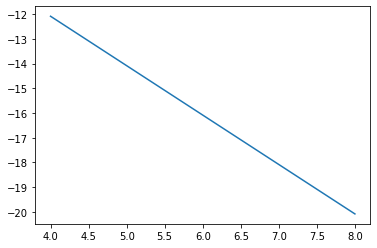

In [0]:
#your input here

n = np.arange(4,9)
h = 1/np.power(2,n) #set step size from 1/16 to 1/256=2^-8

x = np.pi/4
y1 = - np.sin(x)
y2 = sfd(np.sin, x, h)
delta_y = y1 - y2
y = np.log2(np.abs(delta_y))
plt.plot(n, y)

import scipy.stats as stats
order = stats.linregress(n, y)
print('>>>>The convergence order is ' "%.1f" % -round(order[0]))